In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Carregar o arquivo .mat
mat_lat_lon_data_users = scipy.io.loadmat('LatLon_AllUsers.mat')
# Acessar a variável principal
lat_lon_data_users = mat_lat_lon_data_users['LatLon_AllUsers']
# Listar as variáveis dentro do arquivo
# print(mat_lat_lon_data_users.keys())
# print("Tipo de dado:", type(lat_lon_data_users))
# print("Formato:", lat_lon_data_users.shape)
# print("Conteúdo:", lat_lon_data_users)

In [ ]:
# Carregar o arquivo .mat
mat_data_beam_center = scipy.io.loadmat('LatLon_Center.mat')
# Acessar a variável principal
beam_center_data = mat_data_beam_center['LatLon_Center']
# Listar as variáveis dentro do arquivo
# print(mat_data_beam_center.keys())


dict_keys(['__header__', '__version__', '__globals__', 'LatLon_Center'])


In [52]:
# Carregar o arquivo .mat
mat_data = scipy.io.loadmat('Channel_perbeam.mat')
# Acessar a variável principal
channel_data = mat_data['Channel_perbeam']
# Listar as variáveis dentro do arquivo
print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'Channel_perbeam'])


C:\Users\jessi\AppData\Local\Temp\ipykernel_4700\2162237672.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", 108)  # Paleta de cores para até 108 feixes


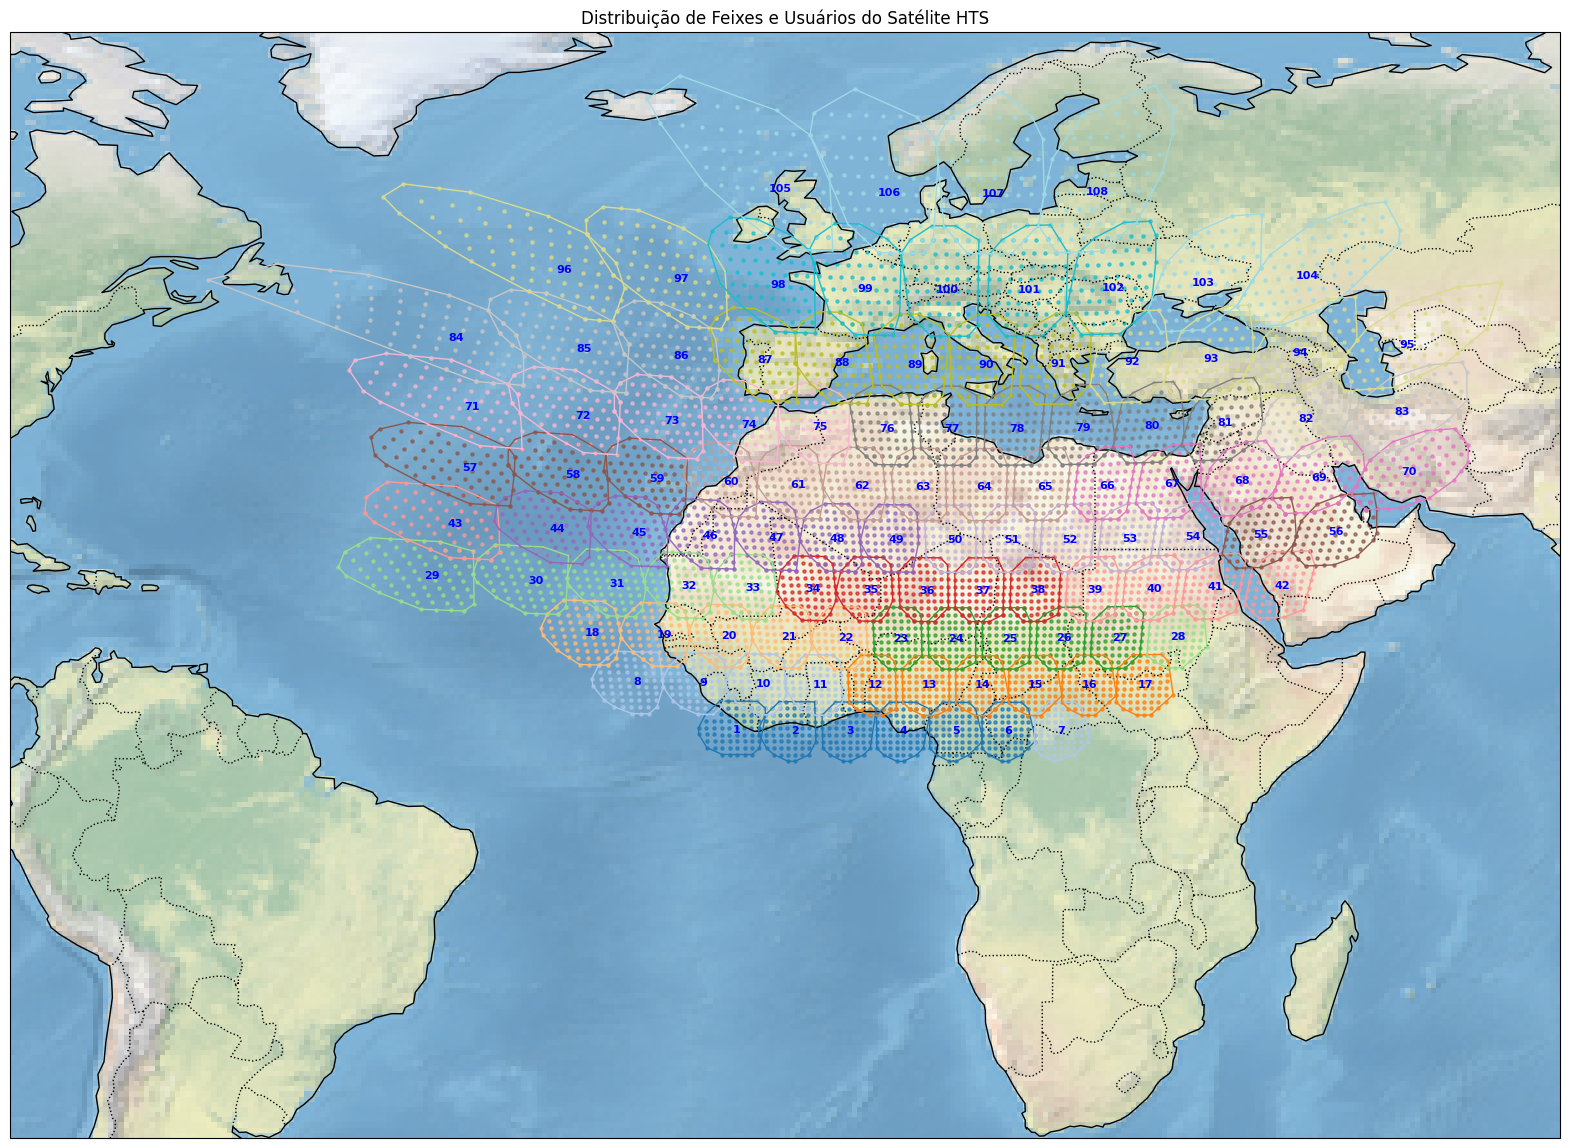

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.spatial import ConvexHull

# Criar a figura e os eixos do mapa
fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Definir limites do mapa
ax.set_extent([-80, 70, -35, 72], crs=ccrs.PlateCarree())

# Adicionar mapa base
ax.stock_img()
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Extrair posições dos feixes
latitudes_beams = beam_center_data[:, 0]
longitudes_beams = beam_center_data[:, 1]

# Gerar cores diferentes para os feixes
colors = plt.cm.get_cmap("tab20", 108)  # Paleta de cores para até 108 feixes

# Plotar feixes e usuários
for beam in range(108):
    latitudes_users = lat_lon_data_users[:, 1, beam]
    longitudes_users = lat_lon_data_users[:, 0, beam]

    # Remover valores NaN antes de criar o casco convexo
    mask = ~np.isnan(latitudes_users) & ~np.isnan(longitudes_users)
    latitudes_users = latitudes_users[mask]
    longitudes_users = longitudes_users[mask]

    # Plota usuários
    ax.scatter(
        longitudes_users, latitudes_users,
        color=colors(beam), s=5, alpha=0.7,
        transform=ccrs.PlateCarree()
    )

    # Criar contorno usando Convex Hull
    if len(latitudes_users) > 3:  # ConvexHull precisa de pelo menos 4 pontos
        points = np.column_stack((longitudes_users, latitudes_users))
        hull = ConvexHull(points)

        # Plotar o contorno do feixe
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], color=colors(beam), lw=1, transform=ccrs.PlateCarree())

    # Adicionar rótulo com o número do feixe no centro
    ax.text(
        longitudes_beams[beam], latitudes_beams[beam], str(beam + 1),
        fontsize=8, color="blue", fontweight="bold",
        ha="center", va="center", transform=ccrs.PlateCarree()
    )

# Configurar rótulos
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Distribuição de Feixes e Usuários do Satélite HTS")

plt.show()

In [56]:
import scipy.io

# Carregar o arquivo .mat
mat_data = scipy.io.loadmat('Channel_perbeam.mat')

# Acessar a matriz do canal
channel_data = mat_data['Channel_perbeam']

# Ver estrutura
print("Shape da matriz de canal:", channel_data.shape)


Shape da matriz de canal: (70, 108, 108)


In [ ]:
beam_k = 0
channel_beam_k = channel_data[:, beam_k, :]
print(channel_beam_k.shape)  # Deve ser (70, 108)
# h_1_0 = channel_beam_k[0, 0]  # Usuário 1 (índice 0), Feixe 0 (índice 0)
# print(h_1_0)
h_1_0 = channel_data[0, 0, 0] # Usuário 1 (índice 0), Feixe 0 (índice 0)
print(h_1_0)



(70, 108)
(6.47822168139016e-08-2.780429710753119e-07j)


In [122]:
# Índices específicos
user_idx = 0   # Usuário 0 (indexação começa em 0)
beam_idx = 0   # Feixe 0 (indexação começa em 0)

# Obter coeficiente de canal h_{0,0}
h_user_idx_user_idx = channel_data[user_idx, beam_idx, beam_idx]

# Exibir o resultado
print(f"h_{{{user_idx:.0f},{beam_idx:.0f}}} = {h_user_idx_user_idx}")

h_{0,0} = (6.47822168139016e-08-2.780429710753119e-07j)


In [123]:
# Índices específicos
user_idx = 10   # Usuário 10 (indexação começa em 0)
beam_idx = 49   # Feixe 49 (indexação começa em 0)

# Obter coeficiente de canal h_{10,49}
h_user_idx_user_idx = channel_data[user_idx, beam_idx, beam_idx]

# Exibir o resultado
print(f"h_{{{user_idx:.0f},{beam_idx:.0f}}} = {h_user_idx_user_idx}")

h_{10,49} = (-3.4025510318374916e-07+3.0406173989986286e-07j)


In [125]:
# Índices específicos
user_idx = 10
beam_idx = 51

# Obter coeficiente de canal h_user_idx_user_idx
h_user_idx_user_idx = channel_data[user_idx, beam_idx, beam_idx]

# Exibir o resultado
print(f"h_{{{user_idx:.0f},{beam_idx:.0f}}} = {h_user_idx_user_idx}")

h_{10,51} = (1.0393243434586446e-07-4.333113234177569e-07j)


In [ ]:
h_i_k_vector = channel_data[user_idx, beam_idx, :]  # Todos os feixes para o usuário i
# Exibir o resultado
# print(f"h_{{{user_idx:.0f},{beam_idx:.0f}}} = {h_i_k_vector}")
# Esse vetor de 108 elementos contém os coeficientes de canal entre o usuário 10 no feixe 51 e todos os 108 feixes. 
# Ou seja, corresponde ao vetor h_{10}^{51} da notação matemática, que é um vetor linha de dimensão  1 X 108
print(h_i_k_vector.shape)  

(108,)


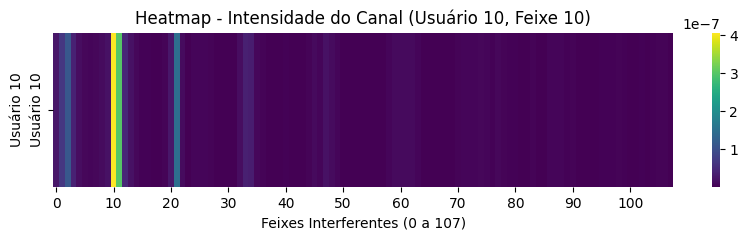

In [62]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Biblioteca para heatmaps

# Carregar dados
mat_data = scipy.io.loadmat('Channel_perbeam.mat')
channel_data = mat_data['Channel_perbeam']

# Selecionar apenas o usuário 10 do feixe 10
user_10_beam_10 = np.abs(channel_data[10, 10, :])  # Vetor de tamanho (108,)

# Criar heatmap
plt.figure(figsize=(10, 2))
sns.heatmap(user_10_beam_10.reshape(1, -1), cmap="viridis", cbar=True, xticklabels=10, yticklabels=["Usuário 10"])

# Configurar rótulos
plt.xlabel("Feixes Interferentes (0 a 107)")
plt.ylabel("Usuário 10")
plt.title("Heatmap - Intensidade do Canal (Usuário 10, Feixe 10)")
plt.show()


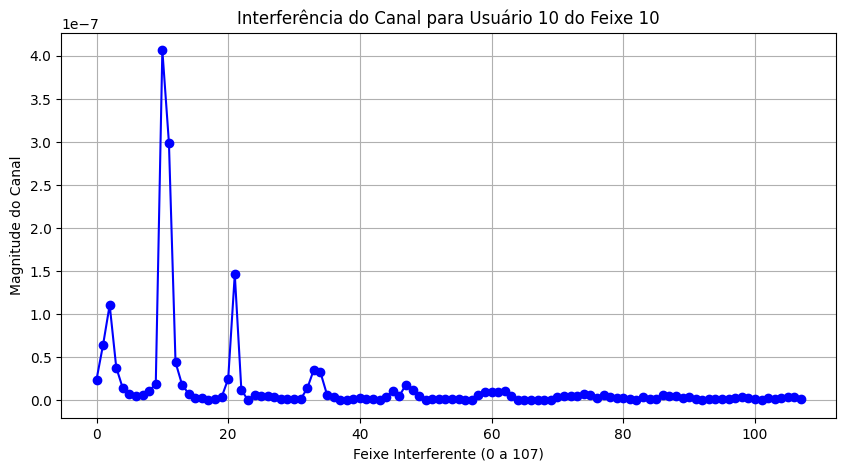

In [63]:
plt.figure(figsize=(10, 5))

# Plotar os coeficientes de canal
plt.plot(range(108), np.abs(user_10_beam_10), marker='o', linestyle='-', color='b')

# Configurar rótulos
plt.xlabel("Feixe Interferente (0 a 107)")
plt.ylabel("Magnitude do Canal")
plt.title("Interferência do Canal para Usuário 10 do Feixe 10")
plt.grid(True)

plt.show()


In [79]:
import scipy.io
import numpy as np

# Carregar dados do arquivo .mat
mat_data = scipy.io.loadmat('Channel_perbeam.mat')
channel_data = mat_data['Channel_perbeam']

# Definir parâmetros
beam_current = 10   # Feixe atual (0 a 107)
beam_interf = 21    # Feixe interferente (0 a 107)
user_current = 0    # Usuário dentro do feixe (0 a 69) - Ajustado para índice Python

# Verificar se os índices estão dentro dos limites
if (0 <= user_current < 70) and (0 <= beam_current < 108) and (0 <= beam_interf < 108):
    
    # Obter coeficientes de canal
    h_10_10 = np.abs(channel_data[user_current, beam_current, beam_current])  # Canal do usuário com o próprio feixe
    h_10_11 = np.abs(channel_data[user_current, beam_current, beam_interf])  # Canal do usuário com feixe interferente

    # Definir ruído normalizado
    sigma2 = 1  # Ruído branco assumido

    # Calcular SINR
    sinr = (h_10_10 ** 2) / ((h_10_11 ** 2) + sigma2)

    # Converter para dB
    sinr_db = 10 * np.log10(sinr)

    # Exibir resultado
    print(f"SINR do usuário {user_current+1} do feixe {beam_current} considerando interferência do feixe {beam_interf}: {sinr_db:.2f} dB")

else:
    print("Erro: Índices fora do intervalo válido.")

# Exibir formato do dataset
# print("Formato:", channel_data.shape)


SINR do usuário 1 do feixe 10 considerando interferência do feixe 21: -130.43 dB


In [108]:
import numpy as np

# Índices específicos
user_idx = 0   # Usuário 10 (começa do zero)
beam_desired = 75  # Feixe desejado

# Extrair coeficientes de canal do usuário
h = channel_data[user_idx, beam_desired, :]  # Todos os feixes vistos pelo usuário

# Potência do sinal desejado (feixe desejado)
signal_power = np.abs(h[beam_desired])**2  

# Potência da interferência (soma de todos os feixes EXCETO o desejado)
interference_power = np.sum(np.abs(np.delete(h, beam_desired))**2)  

# Potência do ruído térmico (ajuste conforme necessário)
noise_power = 10**(-10)  # Assumindo que já está em unidades lineares

# Calcular SINR
sinr = signal_power / (interference_power + noise_power)

# Converter para dB
sinr_db = 10 * np.log10(sinr)

# Exibir resultado
print(f"SINR do usuário {user_idx} no feixe {beam_desired}: {sinr_db:.2f} dB")



SINR do usuário 0 no feixe 75: -29.49 dB


In [ ]:
# Matriz de acoplamento entre os feixes (média sobre os usuários)
beam_coupling = np.mean(np.abs(channel_data), axis=0)

plt.figure(figsize=(8, 6))
plt.imshow(beam_coupling, cmap="coolwarm", aspect="auto")
plt.colorbar(label="Acoplamento Médio")
plt.xlabel("Feixe")
plt.ylabel("Feixe")
plt.title("Matriz de Acoplamento entre Feixes")
plt.show()


In [ ]:
# Mersenne Twister com NumPy
# Define a semente para reprodutibilidade
np.random.seed(42)  

In [ ]:
# ----------------------------- System Parameters -------------------------
# Número de usuários móveis (MSs) no sistema MIMO massivo.
Num_users = 4

In [ ]:
# Número de Antenas na Estação Base (TX)
# A estação base (BS) usa uma matriz de antenas plana uniforme (UPA) com 64 antenas.
TX_ant = 64
# TX_ant_w e TX_ant_h calculam a largura e altura da matriz assumindo um arranjo quadrado
TX_ant_w = int(np.sqrt(TX_ant))  # Largura
TX_ant_h = int(np.sqrt(TX_ant))  # Altura

# Cria índices das antenas na matriz UPA para ajudar no mapeamento espacial.
# Índices das antenas no grid da UPA
ind_TX_w = np.repeat(np.arange(TX_ant_w), TX_ant_h)
ind_TX_h = np.tile(np.arange(TX_ant_h), TX_ant_w)

In [ ]:
# Número de Antenas no Receptor (RX)
# Cada usuário (MS) tem uma UPA menor de 4 antenas.
RX_ant = 4
# RX_ant_w e RX_ant_h calculam a largura e altura da matriz assumindo um arranjo quadrado
RX_ant_w = int(np.sqrt(RX_ant)) # Largura
RX_ant_h = int(np.sqrt(RX_ant)) # Altura

# Define os índices das antenas da matriz UPA do receptor, de forma similar ao transmissor.
ind_RX_w = np.repeat(np.arange(RX_ant_w), RX_ant_h)
ind_RX_h = np.tile(np.arange(RX_ant_h), RX_ant_w)

In [ ]:
# Parâmetros do Canal
Num_paths = 10  # Número de caminhos no canal

### Número de Antenas na Estação Base (TX)

- A estação base (BS) usa uma matriz de antenas plana uniforme (UPA) com 64 antenas.
- TX_ant_w e TX_ant_h calculam a largura e altura da matriz assumindo um arranjo quadrado ($ \sqrt{64} = 8 $).
- Assim, temos uma **UPA de 8 × 8**.

In [ ]:

# ----------------------------- Parâmetros da Simulação ---------------------
# Cria uma faixa de valores de SNR (Signal-to-Noise Ratio) em decibéis (dB).
SNR_dB_range = np.arange(-10, 25, 5)  # Gera valores de SNR de -10 dB a 20 dB, com incremento de 5 dB

In [ ]:
# ----------------------------- Matrizes para Armazenar as Taxas de Transmissão ---------------------
# Taxa para um único usuário (Single User - SU)
Rate_SU = np.zeros(len(SNR_dB_range)) 
# Taxa na estação base (Base Station - BS)
Rate_BS = np.zeros(len(SNR_dB_range)) 
# Taxa usando precoding híbrido (Hybrid Precoding - HP)
Rate_HP = np.zeros(len(SNR_dB_range))  
# Taxa usando Precoding híbrido baseado no critério de erro médio quadrático (MSE)
Rate_HP_MSE = np.zeros(len(SNR_dB_range)) 
# Taxa usando Precoding híbrido usando Filtro de Kalman
Rate_HP_Kalman = np.zeros(len(SNR_dB_range))
# Taxa usando Precoding Totalmente Digital com Zero Forcing (ZF)
Rate_HP_FD_ZF = np.zeros(len(SNR_dB_range))
# Taxa usando 	Precoding Totalmente Digital com MSE
Rate_HP_FD_MSE = np.zeros(len(SNR_dB_range))

In [ ]:
# ----------------------------- Número de Iterações ---------------------
# Define 500 iterações para cada valor de SNR, 
# Permite obter médias estatísticas confiáveis, reduzindo a variabilidade dos resultados.
ITER = 500

In [ ]:
# Laço Principal da Simulação

# A cada iteração, ele gera um novo canal, aplica precoding híbrido e calcula as taxas de transmissão.
for iter in range(ITER):

    # Inicialização das Matrizes
    # Matriz do canal MIMO massivo, com Num_users usuários
    H = np.zeros((Num_users, RX_ant_w * RX_ant_h, TX_ant_w * TX_ant_h), dtype=complex)
    # Vetor de resposta ao array (steering vector) no transmissor.
    a_TX = np.zeros((TX_ant_w * TX_ant_h, Num_users), dtype=complex)
    # Vetor de resposta ao array no receptor
    a_RX = np.zeros((RX_ant_w * RX_ant_h, Num_users), dtype=complex)

    # Arrays que representam as posições das antenas nas UPAs do transmissor e receptor.
    ind_TX_w = np.repeat(np.arange(TX_ant_w), TX_ant_h)
    ind_TX_h = np.tile(np.arange(TX_ant_h), TX_ant_w)
    ind_RX_w = np.repeat(np.arange(RX_ant_w), RX_ant_h)
    ind_RX_h = np.tile(np.arange(RX_ant_h), RX_ant_w)

    # Parâmetros dos Caminhos do Canal
    # Ângulos de partida em elevação (AoD_el)
    AoD_el = np.zeros((Num_users, Num_paths), dtype=complex)
    # Ângulos de partida em azimute (AoD_az)
    AoD_az = np.zeros((Num_users, Num_paths), dtype=complex)
    # Ângulos de chegada em elevação (AoA_el)
    AoA_el = np.zeros((Num_users, Num_paths), dtype=complex)
    # Ângulos de chegada em azimute (AoA_az)
    AoA_az = np.zeros((Num_users, Num_paths), dtype=complex)
    # Ganho complexo de cada caminho
    alpha = np.zeros((Num_users, Num_paths), dtype=complex)

    # Construção do Canal
    for u in range(Num_users):
        AoD_el[u, :] = np.pi * np.random.rand(1, Num_paths) - np.pi / 2
        AoD_az[u, :] = 2 * np.pi * np.random.rand(1, Num_paths)
        AoA_el[u, :] = np.pi * np.random.rand(1, Num_paths) - np.pi / 2
        AoA_az[u, :] = 2 * np.pi * np.random.rand(1, Num_paths)
        # Gera os ângulos de chegada e partida aleatoriamente
        parte_real = norm.ppf(np.random.rand(1, Num_paths))
        parte_imag = 1j * (norm.ppf(np.random.rand(1, Num_paths)))
        # Gera os coeficientes complexos do canal, com parte real e imaginária distribuídas normalmente.
        alpha[u, :] = np.sqrt(1 / Num_paths) * (parte_real + parte_imag)

        # Representa a matriz do canal para um usuário específico.
        # Ela tem dimensão (RX_ant_w * RX_ant_h, TX_ant_w * TX_ant_h), 
        # o que corresponde ao número total de antenas no receptor e transmissor.
        # Inicialização com zeros complexos porque o canal tem componentes 
        # em fase e quadratura (I/Q).
        Temp_Channel = np.zeros((RX_ant_w * RX_ant_h, TX_ant_w * TX_ant_h), dtype=complex)

        # Loop sobre os Caminhos do Canal
        # Como o canal é multi-caminho (Num_paths caminhos), 
        # iteramos sobre cada um deles para construir Temp_Channel.
        for l in range(Num_paths):
            # Construção do Vetor de Resposta da UPA no Transmissor
            # a_TX[:, u] é o vetor de resposta ao array (steering vector) no transmissor.
            # AoD_az[u, l] e AoD_el[u, l] são os ângulos de partida (azimute e elevação)
            # do sinal para este usuário e caminho.
            
            # Normalização do vetor de resposta ao array (steering vector) no transmissor.
            norm_vec_tx = np.sqrt(1 / (TX_ant_w * TX_ant_h))
            # Considera ângulos de azimute e elevação no transmissor.
            az_el_angle_tx = ind_TX_w * np.sin(AoD_az[u, l]) * np.sin(AoD_el[u, l])
            # Considera a componente vertical no transmissor.
            vertical_part_tx = ind_TX_h * np.cos(AoD_el[u, l])
            # Fase do vetor de resposta no transmissor.
            phase_response_tx = np.exp(1j * np.pi * (az_el_angle_tx + vertical_part_tx))
            # Vetor de Resposta da Antena (UPA)
            # Ligeiramente diferente da Equação 7 do paper
            a_TX[:, u] = (norm_vec_tx * phase_response_tx).flatten(order='F')  
            # O método flatten() transforma uma matriz em um vetor unidimensional.
            # O argumento order='F' significa que a conversão segue a ordem de Fortran (coluna por coluna),
            #  ao invés da ordem C padrão (linha por linha).
            # No MATLAB, os arrays são armazenados por coluna (Fortran-order).
            # No Python (NumPy), os arrays são armazenados por linha (C-order, row-major).
            # Usar flatten(order='F') garante que o código em Python mantenha a mesma estrutura que no MATLAB.
            
            # Construção do Vetor de Resposta da UPA no Receptor
            # a_RX[:, u] é o vetor de resposta ao array (steering vector) no receptor.
            # AoA_az[u, l] e AoA_el[u, l] são os ângulos de chegada (azimute e elevação) 
            # do sinal para este usuário e caminho.
            # Normalização do vetor de resposta ao array (steering vector) no receptor.
            norm_vec_rx = np.sqrt(1 / (RX_ant_w * RX_ant_h))
            # Considera ângulos de azimute e elevação no receptor.
            az_el_angle_rx = ind_RX_w * np.sin(AoA_az[u, l]) * np.sin(AoA_el[u, l])
            # Considera a componente vertical no receptor.
            vertical_part_rx = ind_RX_h * np.cos(AoA_el[u, l])
            # A exponencial complexa (parte8) define a fase dos sinais das antenas do receptor.
            # Fase do vetor de resposta no receptor.
            phase_response_rx = np.exp(1j * np.pi * (az_el_angle_rx + vertical_part_rx))
            a_RX[:, u] = (norm_vec_rx * phase_response_rx).flatten(order='F')  # 'F' mantém a ordem do MATLAB
            # O método flatten() transforma uma matriz em um vetor unidimensional.
            # O argumento order='F' significa que a conversão segue a ordem de Fortran (coluna por coluna),
            #  ao invés da ordem C padrão (linha por linha).
            # No MATLAB, os arrays são armazenados por coluna (Fortran-order).
            # No Python (NumPy), os arrays são armazenados por linha (C-order, row-major).
            # Usar flatten(order='F') garante que o código em Python mantenha a mesma estrutura que no MATLAB.
            
            # Cálculo do Canal para um Caminho Específico
            # alpha[u, l] é o coeficiente de ganho complexo do caminho l do usuário u.
            norm_ant = np.sqrt(TX_ant_w * TX_ant_h) * (RX_ant_w * RX_ant_h)
            Temp_Channel += (norm_ant) * np.outer(alpha[u, l] * a_RX[:, u], a_TX[:, u].conj())
        
        # Atualização da Matriz do Canal do Usuário
        # Após somar as contribuições de todos os caminhos, a Temp_Channel final
        #  representa a matriz do canal completa do usuário u.
        H[u, :, :] = Temp_Channel
    ###########################################################################
    # Stage 1 of the proposed algorithm (Analog precoding)
    Frf = np.zeros((TX_ant, Num_users), dtype=complex)
    Wrf = np.zeros((RX_ant, Num_users), dtype=complex)
    for u in range(Num_users):
        Frf[:, u] = a_TX[:, u]
        Wrf[:, u] = a_RX[:, u]
    ###########################################################################
    # Constructin the effective channels
    He = np.zeros((Num_users, RX_ant), dtype=complex)
    for u in range(Num_users):
        Channel = np.zeros((RX_ant, TX_ant), dtype=complex)
        Channel[:, :] = H[u, :, :]  # Extraindo a matriz H do usuário u
        He[u, :] = Wrf[:, u].conj().T @ Channel @ Frf  # Cálculo do canal efetivo
    ###########################################################################
    # effective channel for fully digital precoding
    He_fd = np.zeros((Num_users, TX_ant), dtype=complex)
    for u in range(Num_users):
        Channel = np.zeros((RX_ant, TX_ant), dtype=complex)
        Channel[:, :] = H[u, :, :]  # Extraindo a matriz H do usuário u
        He_fd[u, :] = Wrf[:, u].conj().T @ Channel  # Cálculo do canal efetivo
    ###########################################################################
    # Baseband Zero-Forcing Precoding (ZFBF)
    Fbb = He.conj().T @ (np.linalg.inv(He @ He.conj().T))
    # Normalização dos precodificadores híbridos
    for u in range(Num_users):
        norm_factor = np.sqrt((Frf @ Fbb[:, u]).conj().T @ (Frf @ Fbb[:, u]))
        if norm_factor != 0:  # Evitar divisão por zero
            Fbb[:, u] /= norm_factor  # Normalização
    ###########################################################################
    # =====================================================
    # Fully-Digital Zero-Forcing Precoding (ZFBF)
    # =====================================================
    # Ffd = He_fd' * pinv(He_fd * He_fd')
    Ffd = He_fd.conj().T @ np.linalg.pinv(He_fd @ He_fd.conj().T)
    # Normalização dos precodificadores
    for u in range(Num_users):
        norm_factor = np.linalg.norm(Ffd[:, u])  # Correta normalização da coluna
        if norm_factor != 0:  # Evitar divisão por zero
            Ffd[:, u] /= norm_factor
    ###########################################################################
    count_i = 0
    for count, SNR_dB_i in enumerate(SNR_dB_range, start=1):
        count_i = count_i + 1
        SNR = 10 ** (0.1 * SNR_dB_i) / Num_users  # Converter dB para valor linear
        sigma2 = 1 / SNR  # Variância do ruído
        ################################################################################################################
            # Baseband Zero-Forcing Precoding (ZFBF)
    Fbb = He.conj().T @ (np.linalg.inv(He @ He.conj().T))
    # Normalização dos precodificadores híbridos
    for u in range(Num_users):
        norm_factor = np.sqrt((Frf @ Fbb[:, u]).conj().T @ (Frf @ Fbb[:, u]))
        if norm_factor != 0:  # Evitar divisão por zero
            Fbb[:, u] /= norm_factor  # Normalização
    ####################################################################################################################
    # =====================================================
    # Fully-Digital Zero-Forcing Precoding (ZFBF)
    # =====================================================
    # Ffd = He_fd' * pinv(He_fd * He_fd')
    Ffd = He_fd.conj().T @ np.linalg.pinv(He_fd @ He_fd.conj().T)
    # Normalização dos precodificadores
    for u in range(Num_users):
        norm_factor = np.linalg.norm(Ffd[:, u])  # Correta normalização da coluna
        if norm_factor != 0:  # Evitar divisão por zero
            Ffd[:, u] /= norm_factor
    ####################################################################################################################
    count_i = 0
    for count, SNR_dB_i in enumerate(SNR_dB_range, start=1):
        count_i = count_i + 1
        SNR = 10 ** (0.1 * SNR_dB_i) / Num_users  # Converter dB para valor linear
        sigma2 = 1 / SNR  # Variância do ruído
        ################################################################################################################
        # =====================================================
        # MMSE Baseband Precoder
        # =====================================================
        FbbMSE = np.linalg.inv(He.conj().T @ He + Num_users * sigma2 * Frf.conj().T @ Frf) @ He.conj().T
        # Normalização dos precodificadores híbridos
        for u in range(Num_users):
            norm_factor = np.linalg.norm(Frf @ FbbMSE[:, u])
            if norm_factor != 0:  # Evitar divisão por zero
                FbbMSE[:, u] /= norm_factor
        ################################################################################################################
        # =====================================================
        # Fully-Digital MMSE Precoding
        # =====================================================
        # FfdMSE = inv(He_fd'*He_fd + Num_users*sigma2*eye(TX_ant)) * He_fd'
        FfdMSE = np.linalg.inv(He_fd.conj().T @ He_fd + Num_users * sigma2 * np.eye(TX_ant)) @ He_fd.conj().T
        # Normalização dos precodificadores
        for u in range(Num_users):
            norm_factor = np.linalg.norm(FfdMSE[:, u])  # Correta normalização da coluna
            if norm_factor != 0:  # Evitar divisão por zero
                FfdMSE[:, u] /= norm_factor
        # MSE fully digital precoding
        Rate_HP_FD_MSE[count_i - 1] += np.log2(np.linalg.det(np.eye(Num_users) +
                                                             SNR * (He_fd @ (FfdMSE @ FfdMSE.conj().T) @ He_fd.conj().T))) / (Num_users * ITER)


In [ ]:
# Plotando a eficiência espectral
plt.figure(figsize=(8, 6))
plt.plot(SNR_dB_range, Rate_HP_FD_MSE, '--k', linewidth=2, label="MSE Fully-Digital Precoding")



# Configurações do gráfico
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('Spectral Efficiency (bps/Hz)', fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Simulação
for iter in range(ITER):

    # Inicializa matrizes
    H = np.zeros((Num_users, RX_ant_w * RX_ant_h, TX_ant_w * TX_ant_h), dtype=complex)
    a_TX = np.zeros((TX_ant_w * TX_ant_h, Num_users), dtype=complex)
    a_RX = np.zeros((RX_ant_w * RX_ant_h, Num_users), dtype=complex)

    ind_TX_w = np.repeat(np.arange(TX_ant_w), TX_ant_h)
    ind_TX_h = np.tile(np.arange(TX_ant_h), TX_ant_w)

    ind_RX_w = np.repeat(np.arange(RX_ant_w), RX_ant_h)
    ind_RX_h = np.tile(np.arange(RX_ant_h), RX_ant_w)

    AoD_el = np.zeros((Num_users, Num_paths), dtype=complex)
    AoD_az = np.zeros((Num_users, Num_paths), dtype=complex)
    AoA_el = np.zeros((Num_users, Num_paths), dtype=complex)
    AoA_az = np.zeros((Num_users, Num_paths), dtype=complex)
    alpha = np.zeros((Num_users, Num_paths), dtype=complex)

    # Construção dos canais
    for u in range(Num_users):
        AoD_el[u, :] = np.pi * np.random.rand(1, Num_paths) - np.pi / 2
        AoD_az[u, :] = 2 * np.pi * np.random.rand(1, Num_paths)
        AoA_el[u, :] = np.pi * np.random.rand(1, Num_paths) - np.pi / 2
        AoA_az[u, :] = 2 * np.pi * np.random.rand(1, Num_paths)
        parte_real = norm.ppf(np.random.rand(1, Num_paths))
        parte_imag = 1j * (norm.ppf(np.random.rand(1, Num_paths)))
        alpha[u, :] = np.sqrt(1 / Num_paths) * (parte_real + parte_imag)

        Temp_Channel = np.zeros((RX_ant_w * RX_ant_h, TX_ant_w * TX_ant_h), dtype=complex)
        for l in range(Num_paths):
            parte1 = 1 / (TX_ant_w * TX_ant_h)
            parte2 = ind_TX_w * np.sin(AoD_az[u, l]) * np.sin(AoD_el[u, l])
            parte3 = ind_TX_h * np.cos(AoD_el[u, l])
            parte4 = np.exp(1j * np.pi * (parte2 + parte3))
            a_TX[:, u] = (np.sqrt(parte1) * parte4).flatten(order='F')  # 'F' mantém a ordem do MATLAB
            parte5 = 1 / (RX_ant_w * RX_ant_h)
            parte6 = ind_RX_w * np.sin(AoA_az[u, l]) * np.sin(AoA_el[u, l])
            parte7 = ind_RX_h * np.cos(AoA_el[u, l])
            parte8 = np.exp(1j * np.pi * (parte6 + parte7))
            a_RX[:, u] = (np.sqrt(parte5) * parte8).flatten(order='F')  # 'F' mantém a ordem do MATLAB
            parte9 = (TX_ant_w * TX_ant_h) * (RX_ant_w * RX_ant_h)
            parte10 = alpha[u, l] * a_RX[:, u]
            Temp_Channel += np.sqrt(parte9) * np.outer(parte10, a_TX[:, u].conj())  # Produto externo correto
        H[u, :, :] = Temp_Channel
    ####################################################################################################################
    # Stage 1 of the proposed algorithm (Analog precoding)
    Frf = np.zeros((TX_ant, Num_users), dtype=complex)
    Wrf = np.zeros((RX_ant, Num_users), dtype=complex)
    for u in range(Num_users):
        Frf[:, u] = a_TX[:, u]
        Wrf[:, u] = a_RX[:, u]
    ####################################################################################################################
    # Constructin the effective channels
    He = np.zeros((Num_users, RX_ant), dtype=complex)
    for u in range(Num_users):
        Channel = np.zeros((RX_ant, TX_ant), dtype=complex)
        Channel[:, :] = H[u, :, :]  # Extraindo a matriz H do usuário u
        He[u, :] = Wrf[:, u].conj().T @ Channel @ Frf  # Cálculo do canal efetivo
    ####################################################################################################################
    # effective channel for fully digital precoding
    He_fd = np.zeros((Num_users, TX_ant), dtype=complex)
    for u in range(Num_users):
        Channel = np.zeros((RX_ant, TX_ant), dtype=complex)
        Channel[:, :] = H[u, :, :]  # Extraindo a matriz H do usuário u
        He_fd[u, :] = Wrf[:, u].conj().T @ Channel  # Cálculo do canal efetivo
    ####################################################################################################################
    # Baseband Zero-Forcing Precoding (ZFBF)
    Fbb = He.conj().T @ (np.linalg.inv(He @ He.conj().T))
    # Normalização dos precodificadores híbridos
    for u in range(Num_users):
        norm_factor = np.sqrt((Frf @ Fbb[:, u]).conj().T @ (Frf @ Fbb[:, u]))
        if norm_factor != 0:  # Evitar divisão por zero
            Fbb[:, u] /= norm_factor  # Normalização
    ####################################################################################################################
    # =====================================================
    # Fully-Digital Zero-Forcing Precoding (ZFBF)
    # =====================================================
    # Ffd = He_fd' * pinv(He_fd * He_fd')
    Ffd = He_fd.conj().T @ np.linalg.pinv(He_fd @ He_fd.conj().T)
    # Normalização dos precodificadores
    for u in range(Num_users):
        norm_factor = np.linalg.norm(Ffd[:, u])  # Correta normalização da coluna
        if norm_factor != 0:  # Evitar divisão por zero
            Ffd[:, u] /= norm_factor
    ####################################################################################################################
    count_i = 0
    for count, SNR_dB_i in enumerate(SNR_dB_range, start=1):
        count_i = count_i + 1
        SNR = 10 ** (0.1 * SNR_dB_i) / Num_users  # Converter dB para valor linear
        sigma2 = 1 / SNR  # Variância do ruído
        ################################################################################################################
        # =====================================================
        # MMSE Baseband Precoder
        # =====================================================
        FbbMSE = np.linalg.inv(He.conj().T @ He + Num_users * sigma2 * Frf.conj().T @ Frf) @ He.conj().T
        # Normalização dos precodificadores híbridos
        for u in range(Num_users):
            norm_factor = np.linalg.norm(Frf @ FbbMSE[:, u])
            if norm_factor != 0:  # Evitar divisão por zero
                FbbMSE[:, u] /= norm_factor
        ################################################################################################################
        # =====================================================
        # Fully-Digital MMSE Precoding
        # =====================================================
        # FfdMSE = inv(He_fd'*He_fd + Num_users*sigma2*eye(TX_ant)) * He_fd'
        FfdMSE = np.linalg.inv(He_fd.conj().T @ He_fd + Num_users * sigma2 * np.eye(TX_ant)) @ He_fd.conj().T
        # Normalização dos precodificadores
        for u in range(Num_users):
            norm_factor = np.linalg.norm(FfdMSE[:, u])  # Correta normalização da coluna
            if norm_factor != 0:  # Evitar divisão por zero
                FfdMSE[:, u] /= norm_factor
        ################################################################################################################
        # =====================================================
        # Kalman Baseband Precoder
        # =====================================================
        Fbbk = np.eye(Num_users, Num_users, dtype=complex)
        RN1 = Fbbk @ Fbbk.conj().T
        Qm = np.eye(Num_users) * sigma2
        # Number of Kalman iterations
        ITERK=10
        for ii in range(ITERK):
             Hk = He
             K = RN1 @ Hk.conj().T @ np.linalg.pinv(Hk @ RN1 @ Hk.conj().T + Qm)  # Ganho de Kalman
             errk = np.eye(Num_users) - Hk @ Fbbk
             # errk = errk / np.linalg.norm(errk)
             errk /= np.linalg.norm(errk, 2)  # Normalização do erro
             Fbbk = Fbbk + K @ errk  # Atualização do precodificador
             RN = RN1 - K @ Hk @ RN1
             RN1 = RN
        # Normalização dos precodificadores híbridos
        for u in range(Num_users):
            norm_factor = np.linalg.norm(Frf @ Fbbk[:, u])  # Normalização correta
            if norm_factor != 0:  # Evitar divisão por zero
                Fbbk[:, u] /= norm_factor
        ################################################################################################################
        # Inicializando as variáveis de taxa de dados


        # Loop sobre os usuários
        for u in range(Num_users):
            Int_set = [i for i in range(Num_users) if i != u]  # Índices de interferência

            # Extraindo a matriz de canal do usuário u
            Channel = np.zeros((RX_ant, TX_ant), dtype=complex)
            Channel[:, :] = H[u, :, :]

            # Decomposição SVD
            U_channel, S_diag, V_channel = np.linalg.svd(Channel)

            # Expandir S_channel para uma matriz do mesmo tamanho do MATLAB (4x64)
            S_channel = np.zeros((U_channel.shape[0], V_channel.shape[0]))  # (4x64)
            np.fill_diagonal(S_channel, S_diag)  # Preenche a diagonal com os valores singulares
            # ------------------------------------------------------------
            # Taxa para o caso Single-User (SU)
            # Single-user rate
            Rate_SU[count_i - 1] += np.log2(1 + SNR * S_channel[0, 0] ** 2) / (Num_users * ITER)
            # ------------------------------------------------------------
            # Beamforming apenas analógico (Analog-only beamforming)
            numerador = SNR * (np.abs(Wrf[:, u].conj().T @ Channel @ Frf[:, u]) ** 2)
            denominador = SNR * np.sum(np.abs(Wrf[:, u].conj().T @ Channel @ Frf[:, Int_set]) ** 2) + 1
            SINR_BS = numerador / denominador
            # Atualiza a taxa do beamforming analógico
            Rate_BS[count_i - 1] += np.log2(1 + SINR_BS) / (Num_users * ITER)
        ################################################################################################################
        # Hybrid Precoding
        Rate_HP[count_i - 1] += np.log2(np.linalg.det((np.eye(Num_users)) +
                                                      SNR * (He @ (Fbb @ Fbb.conj().T) @ He.conj().T))) / (Num_users * ITER)
        ################################################################################################################
        # Hybrid Precoding MMSE
        Rate_HP_MSE[count_i - 1] += np.log2(np.linalg.det(np.eye(Num_users) +
                                                          SNR * (He @ (FbbMSE @ FbbMSE.conj().T) @ He.conj().T))) / (Num_users * ITER)
        ################################################################################################################
        # Hybrid Precoding Kalman
        Rate_HP_Kalman[count_i - 1] += np.log2(np.linalg.det(np.eye(Num_users) +
                                                             SNR * (He @ (Fbbk @ Fbbk.conj().T) @ He.conj().T))) / (Num_users * ITER)
        ################################################################################################################
        # ZF fully digital precoding
        Rate_HP_FD_ZF[count_i - 1] += np.log2(np.linalg.det(np.eye(Num_users) +
                                                            SNR * (He_fd @ (Ffd @ Ffd.conj().T) @ He_fd.conj().T))) / (Num_users * ITER)
        ################################################################################################################
        # MSE fully digital precoding
        Rate_HP_FD_MSE[count_i - 1] += np.log2(np.linalg.det(np.eye(Num_users) +
                                                             SNR * (He_fd @ (FfdMSE @ FfdMSE.conj().T) @ He_fd.conj().T))) / (Num_users * ITER)


In [ ]:
# Plotando a eficiência espectral
plt.figure(figsize=(8, 6))
plt.plot(SNR_dB_range, Rate_SU, '-mv', linewidth=1.5, label="Single-user (No Interference)")
plt.plot(SNR_dB_range, Rate_HP, '-rs', linewidth=1.5, label="ZF Hybrid Precoding")
plt.plot(SNR_dB_range, Rate_HP_MSE, '-b*', linewidth=1.5, label="MMSE Hybrid Precoding")
plt.plot(SNR_dB_range, Rate_HP_Kalman, '-go', linewidth=1.5, label="Kalman Hybrid Precoding")
plt.plot(SNR_dB_range, Rate_HP_FD_MSE, '--k', linewidth=2, label="MSE Fully-Digital Precoding")

# Verificando a condição para o número de caminhos
if Num_paths == 1:
    plt.plot(SNR_dB_range, Rate_BS, '-ro', linewidth=1.5, label="Analog-only Beamsteering")
else:
    plt.plot(SNR_dB_range, Rate_BS, '-ko', linewidth=1.5, label="Analog-only Beamsteering")

# Configurações do gráfico
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('Spectral Efficiency (bps/Hz)', fontsize=12)
plt.legend()
plt.grid()
plt.show()
